# Исследование объявлений о продаже квартир

**Описание проекта:**

Для анализа предоставлены данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Задача проекта — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

**Описание данных:**

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

<a id="point0"></a>
**Оглавление**:
* [1 Шаг 1. Открытие файла с данными и изучение общей информации](#Шаг-1.-Открытие-файла-с-данными-и-изучение-общей-информации)
  * [1.1 Загрузка данных из файла в датафрейм](#Загрузка-данных-из-файла-в-датафрейм)
  * [1.2 Изучение общей информации о полученном датафрейме](#Изучение-общей-информации-о-полученном-датафрейме)
  * [1.3 Построение общей гистограммы для всех числовых столбцов таблицы](#Построение-общей-гистограммы-для-всех-числовых-столбцов-таблицы)
* [2 Шаг 2. Предобработка данных](#Шаг-2.-Предобработка-данных)
  * [2.1 Переименование столбцов](#Переименование-столбцов)
  * [2.2 Обработка пропусков](#Обработка-пропусков)
    * [2.2.1 Пропуски в столбце <code>locality_name</code>](#Пропуски-в-столбце-locality_name)
    * [2.2.2 Пропуски в столбце <code>floors_total</code>](#Пропуски-в-столбце-floors_total)
    * [2.2.3 Пропуски в столбце <code>ceiling_height</code>](#Пропуски-в-столбце-ceiling_height)
    * [2.2.4 Пропуски в столбце <code>living_area</code>](#Пропуски-в-столбце-living_area)
    * [2.2.5 Пропуски в столбце <code>is_apartment</code>](#Пропуски-в-столбце-is_apartment)
    * [2.2.6 Пропуски в столбце <code>kitchen_area</code>](#Пропуски-в-столбце-kitchen_area)
    * [2.2.7 Пропуски в столбце <code>balcony</code>](#Пропуски-в-столбце-balcony)
    * [2.2.8 Пропуски в столбце <code>days_exposition</code>](#Пропуски-в-столбце-days_exposition)
    * [2.2.9 Пропуски в столбцах <code>parks_around3000</code> и <code>ponds_around3000</code>](#Пропуски-в-столбцах-parks_around3000-и-ponds_around3000)
    * [2.2.10 Пропуски в <code>city_centers_nearest</code>](#Пропуски-в-city_centers_nearest)
    * [2.2.11 Пропуски в остальных столбцах](#Пропуски-в-остальных-столбцах)
  * [2.3 Изменение типов данных](#Изменение-типов-данных)
  * [2.4 Обработка дубликатов](#Обработка-дубликатов)
    * [2.4.1 Обработка явных дубликатов](#Обработка-явных-дубликатов)
    * [2.4.2 Обработка неявных дубликатов](#Обработка-неявных-дубликатов)
  * [2.5 Обработка аномальных значений](#Обработка-аномальных-значений)
    * [2.5.1 Столбец <code>ceiling_height</code>](#Столбец-ceiling_height)
    * [2.5.2 Другие столбцы](#Другие-столбцы)
* [3 Шаг 3. Категоризация данных](#Шаг-3.-Категоризация-данных)
* [4 Шаг 4. Исследовательский анализ данных](#Шаг-4.-Исследовательский-анализ-данных)
  * [4.1 Изучение параметров объектов](#Изучение-параметров-объектов)
  * [4.2 Исследование количества дней публикации объявления](#Исследование-количества-дней-публикации-объявления)
  * [4.3 Исследование факторов, влияющих на общую (полную) стоимость объекта](#Исследование-факторов,-влияющих-на-общую-(полную)-стоимость-объекта)
    * [4.3.1 Анализ стоимости объекта от общей площади](#Анализ-стоимости-объекта-от-общей-площади)
    * [4.3.2 Анализ стоимости объекта от жилой площади](#Анализ-стоимости-объекта-от-жилой-площади)
    * [4.3.3 Анализ стоимости объекта от площади кухни](#Анализ-стоимости-объекта-от-площади-кухни)
    * [4.3.4 Анализ стоимости объекта от количества комнат](#Анализ-стоимости-объекта-от-количества-комнат)
    * [4.3.5 Анализ стоимости объекта от этажа, на котором расположена квартира (первый, последний, другой)](#Анализ-стоимости-объекта-от-этажа,-на-котором-расположена-квартира-(первый,-последний,-другой))
    * [4.3.6 Анализ стоимости объекта от даты размещения (день недели, месяц, год)](#Анализ-стоимости-объекта-от-даты-размещения-(день-недели,-месяц,-год))
  * [4.4 Анализ средней стоимости одного квадратного метра](#Анализ-средней-стоимости-одного-квадратного-метра)
  * [4.5 Анализ средней стоимости квадратного метра в зависимости от удаленности от центра](#Анализ-средней-стоимости-квадратного-метра-в-зависимости-от-удаленности-от-центра)
* [5 Общий вывод](#Общий-вывод)

## Шаг 1. Открытие файла с данными и изучение общей информации
### Загрузка данных из файла в датафрейм

In [1]:
import pandas as pd  # Импорт библиотеки pandas
import matplotlib.pyplot as plt  # Импорт библиотеки для работы с графиками

# загрузка данных
data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")

# вывод чисел в неэкспоненциальном формате
pd.options.display.float_format = "{:,.1f}".format

### Изучение общей информации о полученном датафрейме

In [2]:
data.head() # Вывод первых строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


In [3]:
data.info() # Вывод основной информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe() # Вывод основной описательной информации по числовым столбцам датафрейма

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.0","23,699.0","23,699.0","23,699.0","14,504.0","23,613.0","21,796.0","23,699.0","21,421.0","12,180.0","18,157.0","18,180.0","18,181.0","8,079.0","18,181.0","9,110.0","20,518.0"
mean,9.9,"6,541,548.8",60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,"28,793.7","14,191.3",0.6,490.8,0.8,518.0,180.9
std,5.7,"10,887,013.3",35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,"12,630.9","8,608.4",0.8,342.3,0.9,277.7,219.7
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,"3,400,000.0",40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,"18,585.0","9,238.0",0.0,288.0,0.0,294.0,45.0
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,"26,726.0","13,098.5",0.0,455.0,1.0,502.0,95.0
75%,14.0,"6,800,000.0",69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,"37,273.0","16,293.0",1.0,612.0,1.0,729.0,232.0
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,"84,869.0","65,968.0",3.0,"3,190.0",3.0,"1,344.0","1,580.0"


### Построение общей гистограммы для всех числовых столбцов таблицы

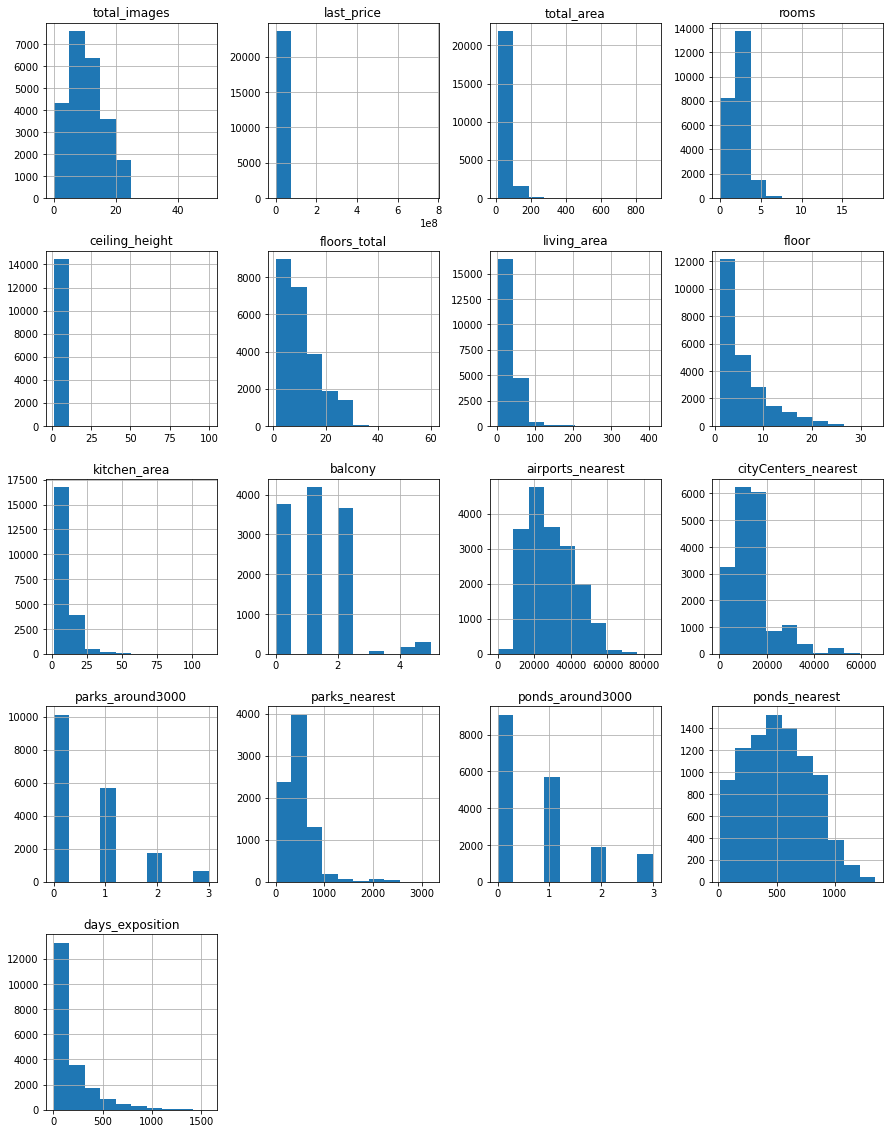

In [5]:
data.hist(figsize=(15, 20));

**Выводы**: 
* Датафрейм представляет собой набор данных состоящий из 22 столбцов и 23699 строк
* Типы данных в столбцах распределены следующим образом: bool(2), float64(14), int64(3), object(3)
* Столбец `first_day_exposition`, который содержит информацию о дате, имеет тип данных `object`, необходимо изменить тип на `datetime`
* В 14 из 22 столбцах присутсвуют пропущенные значения (`'ceiling_height'`, `'floors_total'`, `'living_area'`, и др)
* Некоторые столбцы, например `'ceiling_height'`, определенно содержат аномальные значения

[Вернуться к оглавлению](#point0)

## Шаг 2. Предобработка данных
При предварительной обработке данных нужно особое внимание уделить тем группам данных, на основе которых будет проводится анализ.

### Переименование столбцов
Выведем список заголовков столбцов нашего датасета:

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
def is_that_snake(list_of_strings):
    """
    Данная функция получает на входе список со строковыми значениями (например, список заголовков датафрейма)
    и поочередно проверяет наличие НЕжелательных для оформления символов.
    Желательные символы: английский алфавит в нижнем регистре, нижнее подчеркивание и цифры от 0 до 9
    """
    snake_symbols, bad_list = list('abcdefghijklmnopqrstuvwxyz_0123456789'), []
    for i in list_of_strings:
        if set(i).issubset(snake_symbols): # проверка, что все элементы подмножества i
            pass                           # принадлежат множеству snake_symbols
        else:
            bad_list.append(i)
    return f'(!) Следует обратить внимание: {bad_list}' if bad_list else '✅ Проблем с регистром не обнаружено'    

Проверим список заголовков столбцов с помощью функции `is_that_snake()`, которая проверяет на наличие символов, которые недопустимы для "змеиного регистра".

In [8]:
is_that_snake(data.columns)

"(!) Следует обратить внимание: ['cityCenters_nearest']"

Результат вызова функции: `cityCenters_nearest`, поскольку в данном заголовке содержится заглавная буква.

Переименуем данный заголовок в датасете:

In [9]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

Еще раз проверим список заголовков, чтобы убедиться, в изменении названия столбца, а также вызовем функцию проверки оформления, которая подскажет все ли теперь в порядке.

In [10]:
display(data.columns)
is_that_snake(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

'✅ Проблем с регистром не обнаружено'

[Вернуться к оглавлению](#point0)

### Обработка пропусков
Выведем количество пропущенных значений для каждого столбца:

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

[Вернуться к оглавлению](#point0)
#### Пропуски в столбце `locality_name`
Пропуски в столбце с названием населенного пункта удалим как малоинформативные. 49 пропусков составляют около 0.2% от всего объема, что не должно быть критично.

In [12]:
# Удаляем из датасета строки, где в столбце 'locality_name' имеется пропуск
data = data.dropna(subset=['locality_name'])

Проверяем, что пропусков не осталось:

In [13]:
data['locality_name'].isna().sum()

0

[Вернуться к оглавлению](#point0)
#### Пропуски в столбце `floors_total`
В нашем датасете 86 пропусков для данного столбца. Выведем 5 строк, где есть пропуски в данном столбце.

In [14]:
data.query('floors_total.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,"11,640,000.0",65.2,2018-10-02T00:00:00,2,NaN,NaN,30.8,4,NaN,...,12.0,NaN,Санкт-Петербург,"39,197.0","12,373.0",1.0,123.0,0.0,NaN,49.0
237,4,"2,438,033.0",28.1,2016-11-23T00:00:00,1,NaN,NaN,20.8,1,NaN,...,NaN,0.0,Санкт-Петербург,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,251.0
457,4,"9,788,348.0",70.8,2015-08-01T00:00:00,2,NaN,NaN,38.4,12,NaN,...,10.6,0.0,Санкт-Петербург,"37,364.0","8,322.0",2.0,309.0,2.0,706.0,727.0
671,4,"6,051,191.0",93.6,2017-04-06T00:00:00,3,NaN,NaN,47.1,8,NaN,...,16.8,0.0,Санкт-Петербург,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,123.0
1757,5,"3,600,000.0",39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"22,735.0","11,618.0",1.0,835.0,1.0,652.0,77.0


В принципе, такое небольшое число строк можно отбросить. Но рамках данного проекта я присвою пропуски в `floors_total` медианными значениям для каждого значения из `floor`.

In [15]:
for t in data['floor'].unique():
    data.loc[(data['floor'] == t) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['floor'] == t), 'floors_total'].median()

Проверим как изменились значения:

In [16]:
floot_total_isna_index = [186, 237, 457, 671, 1757] # набор индексов строк, где были пропуски
data.query('index in @floot_total_isna_index')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,"11,640,000.0",65.2,2018-10-02T00:00:00,2,NaN,5.0,30.8,4,NaN,...,12.0,NaN,Санкт-Петербург,"39,197.0","12,373.0",1.0,123.0,0.0,NaN,49.0
237,4,"2,438,033.0",28.1,2016-11-23T00:00:00,1,NaN,5.0,20.8,1,NaN,...,NaN,0.0,Санкт-Петербург,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,251.0
457,4,"9,788,348.0",70.8,2015-08-01T00:00:00,2,NaN,16.0,38.4,12,NaN,...,10.6,0.0,Санкт-Петербург,"37,364.0","8,322.0",2.0,309.0,2.0,706.0,727.0
671,4,"6,051,191.0",93.6,2017-04-06T00:00:00,3,NaN,10.0,47.1,8,NaN,...,16.8,0.0,Санкт-Петербург,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,123.0
1757,5,"3,600,000.0",39.0,2017-04-22T00:00:00,1,NaN,10.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"22,735.0","11,618.0",1.0,835.0,1.0,652.0,77.0


[Вернуться к оглавлению](#point0)
#### Пропуски в столбце `ceiling_height`
Выведем несколько строк с пропусками в столбце `'ceiling_height'` (высота потолков, м)

In [17]:
data.query('ceiling_height.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,"3,700,000.0",37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,"52,996.0","19,143.0",0.0,NaN,0.0,NaN,155.0


Пропуски для данного столбца можно заполнить медианным значением высоты потолка для зданий соотвествующей этажности. Но это можно сделать только для таких случаев, где для указанного количества этажей есть хотя бы одна запись с высотой потолка.

Проверим, это условие.

In [18]:
for el in data['floors_total'].unique():
    # количество записей с пропуском для данного числа этажей
    c1 = len(data.query('floors_total == @el and ceiling_height.isna()'))
    
    # общее количество записей для данного числа этажей    
    c2 = len(data.query('floors_total == @el')) 
    
    # если кол-во пропусков равно кол-ву записей равно:
    if c1 == c2: 
        print(f'Высота потолка: {el}, Записей с пропуском: {c1}, Всего записей: {c2}')

Высота потолка: 33.0, Записей с пропуском: 1, Всего записей: 1


Для здания с количеством этажей `33` есть только одна запись в датасете и в ней отсутсвует значение высоты потолка:

In [19]:
data.query('floors_total == 33')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,"9,900,000.0",101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,"18,732.0","20,444.0",0.0,NaN,3.0,80.0,53.0


Поскольку в нашем случае только одна подобная запись, можно вручную ввести значение на основе [информации имеющей в открытом доступе](https://spb.cian.ru/cat.php?deal_type=sale&engine_version=2&minfloor=30&offer_type=flat&region=2&room1=1&room2=1). Для 33-ти этажного здания установлю высоту потолков равную 2.7 м

In [20]:
data.loc[(data['floors_total'] == 33) & (data['ceiling_height'].isna()), 'ceiling_height'] = 2.7

Проверим запись:

In [21]:
data.query('floors_total == 33')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,"9,900,000.0",101.0,2016-04-28T00:00:00,3,2.7,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,"18,732.0","20,444.0",0.0,NaN,3.0,80.0,53.0


Остальные пропуски в данном столбце заполним медианным значением для зданий соотвествующей этажности.

In [22]:
for t in data['floors_total'].unique():
    data.loc[(data['floors_total'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == t), 'ceiling_height'].median()

Проверим, что пропусков не осталось:

In [23]:
data['ceiling_height'].isna().sum()

0

[Вернуться к оглавлению](#point0)

#### Пропуски в столбце `living_area`
Выведем первые 5 строк с пропусками в данном столбце:

In [24]:
data.query('living_area.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,2.6,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,2.8,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
30,12,"2,200,000.0",32.8,2018-02-19T00:00:00,1,2.5,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,"1,990,000.0",45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,"5,350,000.0",40.0,2018-11-18T00:00:00,1,2.8,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,"30,471.0","11,603.0",1.0,620.0,1.0,"1,152.0",NaN


Заполнить пропуски в столбце с **жилой площадью** можно через отношение *медианных значений* <ins>жилой</ins> и <ins>общей площади</ins> для выборки квартир с указанным количеством комнат. В столбцах `total_area` и `rooms` пропусков нет, поэтому задача выполнима.

In [25]:
# перебор значений кол-ва комнат
for el in data['rooms'].unique():
    
    # отношения жилой к общей площади для указанного кол-ва комнат
    tl_ratio = data.query('rooms==@el')['living_area'].median() / data.query('rooms==@el')['total_area'].median() 
    
    data.loc[(data['rooms'] == el) & (data['living_area'].isna()), 'living_area'] = data['total_area'] * tl_ratio

Проверим рассчитанные значения в нескольких строках:

In [26]:
living_area_isna_index = [37, 44, 23663] # набор индексов строк, где были пропуски
data.query('index in @living_area_isna_index')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
37,10,"1,990,000.0",45.8,2017-10-28T00:00:00,2,2.5,5.0,26.4,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,"5,350,000.0",40.0,2018-11-18T00:00:00,1,2.8,22.0,19.3,3,NaN,...,NaN,1.0,Санкт-Петербург,"30,471.0","11,603.0",1.0,620.0,1.0,"1,152.0",NaN
23663,12,"6,400,000.0",88.0,2018-01-12T00:00:00,4,2.5,10.0,56.4,1,NaN,...,NaN,NaN,Санкт-Петербург,"33,642.0","13,943.0",0.0,NaN,2.0,844.0,59.0


Проверим, что пропусков не осталось:

In [27]:
data['living_area'].isna().sum()

0

[Вернуться к оглавлению](#point0)
#### Пропуски в столбце `is_apartment`
Выведем общую информацию о данном столбце:

In [28]:
print(f"В столбце 'is_apartment' {data['is_apartment'].isna().sum()} пропусков,",
      f"\n\nприсутствуют следующие значения:\n{data['is_apartment'].unique()}")

В столбце 'is_apartment' 20890 пропусков, 

присутствуют следующие значения:
[nan False True]


В данном столбце значения булева типа. Заполню пропуски значениями `False`.

In [29]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Проверим, что пропусков не осталось:

In [30]:
data['living_area'].isna().sum()

0

[Вернуться к оглавлению](#point0)
#### Пропуски в столбце `kitchen_area`
Для заполнения пропусков в данном столбце есть две идеи:
1. Для квартир, где количество комнат `'rooms == 0'` (очевидно, подразумевается, что это квартиры-студии или что-то подобное), если площадь кухни не указана, то она равна нулю. Не берусь утверждать, что это абсолютно верно, но утверждение, что в квартирах-студиях площадь кухни (может быть) равна нулю подтвердил компетентный в области недвижимости человек.
2. Для квартир с количеством комнат `> 0`, рассчитать площадь кухни через процентное соотношение медиан общей и кухонной площади для выборки квартир с указанным количеством комнат.

Проверим, какие значения есть в столбце `kitchen_area` для квартир количеством комнат `0`:

In [31]:
data.query('rooms == 0')['kitchen_area'].unique()

array([nan])

Как видно, для "квартир-студий" во всех случаях пропуски для площади кухни.

Заполним пропуски нулями.

In [32]:
data.loc[(data['rooms'] == 0) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0

Теперь заполним пропуски для квартир с количеством комнат `1` и более:

In [33]:
# перебор значений кол-ва комнат
for el in data['rooms'].unique():
    
    # отношение площади кухни к общей площади для указанного кол-ва комнат
    tk_ratio = data.query('rooms==@el')['kitchen_area'].median() / data.query('rooms==@el')['total_area'].median() 
    
    data.loc[(data['rooms'] == el) & (data['kitchen_area'].isna()), 'kitchen_area'] = data['total_area'] * tk_ratio

Проверим, что пропусков не осталось:

In [34]:
data['kitchen_area'].isna().sum()

0

[Вернуться к оглавлению](#point0)
#### Пропуски в столбце `balcony`

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [35]:
data['balcony'] = data['balcony'].fillna(0)

Проверим, что пропусков не осталось:

In [36]:
data['balcony'].isna().sum()

0

[Вернуться к оглавлению](#point0)
#### Пропуски в столбце `days_exposition`
В данном столбце записаны значения количества дней, в течение которого было размещено объявление от публикации до снятия.  

In [37]:
data['days_exposition'].describe()

count   20,470.0
mean       180.8
std        219.8
min          1.0
25%         45.0
50%         95.0
75%        231.0
max      1,580.0
Name: days_exposition, dtype: float64

Минимальное значение: `1`, максимальное: `1580`.  

Есть предположение, что пропуск в данном столбце означает, что квартира все еще находится в стадии продажи.

Если присвоить пропуску любое положительное или равное `0` значение - это внесет искажение в данные. Есть две идеи как поступить в данном случае - либо оставить пропуски как есть, либо присвоить им "аномальное" значение, например `-1`.

In [38]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

Проверим, что пропусков не осталось:

In [39]:
data['days_exposition'].isna().sum()

0

[Вернуться к оглавлению](#point0)
#### Пропуски в столбцах `parks_around3000` и `ponds_around3000`
При заполнении пропусков в столбцах `parks_around3000` (число парков в радиусе 3 км) и `ponds_around3000` (число водоёмов в радиусе 3 км) нужно следовать следующей логике:
* **Условие 1**: Если для записи с пропуском в столбце `parks_around3000`/`ponds_around3000` в столбце `parks_nearest`/`ponds_nearest` значение `<= 3000`, то заполнить пропуск значением `1`
* **Условие 2**: Иначе, заполнить пропуски значениями `0`

Проверим:

In [40]:
display(
    f"Количество строк 'parks_around3000' подходящих условию 1: \
{len(data.query('parks_nearest <= 3000 and parks_around3000.isna()'))}"
)
display(
    f"Количество строк 'ponds_around3000' подходящих условию 1: \
{len(data.query('parks_nearest <= 3000 and parks_around3000.isna()'))}"
)

"Количество строк 'parks_around3000' подходящих условию 1: 0"

"Количество строк 'ponds_around3000' подходящих условию 1: 0"

Поскольку строк удовлетворяющим первому условию не выявлено, заполним пропуски в данных столбцах `0`:

In [41]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Проверим, что пропусков не осталось:

In [42]:
data['parks_around3000'].isna().sum(), data['ponds_around3000'].isna().sum()

(0, 0)

[Вернуться к оглавлению](#point0)
#### Пропуски в `city_centers_nearest`
В данном столбце, согласно описанию данных, представлены значения "расстояния до центра города (м)". 

Расстояние для всех рассматриваемых населенных пунктов рассчитывается до центра г. Санкт-Петербурга, как пример - Петергоф:

In [43]:
loc = 'Петергоф'
data.query('locality_name == @loc')['city_centers_nearest'].describe()

count      201.0
mean    35,468.9
std      5,687.9
min     29,815.0
25%     31,493.0
50%     33,771.0
75%     35,511.0
max     49,574.0
Name: city_centers_nearest, dtype: float64

В данном столбце насчитывается `5511` пропусков, что составляет <font color='red'>~23%</font> от всех данных - отбросить строки с пропусками означает пожертвовать огромным массивом данных. 

Попытаюсь заполнить пропуски в данном столбце подставив медианные значения для рассматриваемого населенного пункта, там где это будет возможно. Выполню это чуть позже, после того как буду уверен, что названия населенных пунктов в порядке (см. [пункт 2.4.2](#point2210)).

[Вернуться к оглавлению](#point0)
#### Пропуски в остальных столбцах
Выведем еще раз общий результат по пропускам:

In [44]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition             0
dtype: int64

Пропуски для столбцов: `airports_nearest`, `parks_nearest` и `ponds_nearest` решаю оставить как есть.

Без конкретной цели удалять эти строки или пытаться найти для них значения - трудоемкая задача.

[Вернуться к оглавлению](#point0)
### Изменение типов данных
Изменим тип данных в столбце `first_day_exposition` на `datetime`:

In [45]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

В столбцах `balcony`, `floors_total`, `parks_around3000`, `ponds_around3000`, `days_exposition` должны быть целочисленные значения.  
Изменим тип данных на `int`:


In [46]:
for item in ['balcony', 'floors_total', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
    data[item] = data[item].astype(int)

[Вернуться к оглавлению](#point0)
### Обработка дубликатов
#### Обработка явных дубликатов

In [47]:
data.duplicated().sum() # подсчёт явных дубликатов

0

Явных дубликатов в датасете не выявлено.
#### Обработка неявных дубликатов
Проверим сколько уникальных значений в столбце `locality_name`:

In [48]:
f'Количество уникальных значений в стобце: {len(data["locality_name"].unique())}'
# data["locality_name"].unique() # если требуется обратиться к списку уникальных значений

'Количество уникальных значений в стобце: 364'

Если попытаться проанализировать представленые в списке данные, то можно заметить, что названия некоторых топонимов встречаются в различных формах, например:
* поселок **Рябово**
* поселок городского типа **Рябово**
* посёлок городского типа **Рябово**

И хотя, конкретно для случая с поселком Рябово - в Ленинградской области существует [два таких населенных пункта](https://ru.wikipedia.org/wiki/%D0%A0%D1%8F%D0%B1%D0%BE%D0%B2%D0%BE#%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D0%B3%D1%80%D0%B0%D0%B4%D1%81%D0%BA%D0%B0%D1%8F_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C) расположенных в разных районах, но по имеющейся у нас в распоряжении информации мы не можем их между собой разделить (как два отдельных).

Для возможности более эффективного использования имеющейся у нас в датасете информации, будет предпочтительно **изменить формат названий населенных пунктов** убрав из них *типы* топонимов.

In [49]:
loc_dict = {
    "садоводческое некоммерческое товарищество": "", # словарь со списком
    "садовое товарищество": "",                      # типов топонимов
    "посёлок при железнодорожной станции": "",       # для замены или удаления
    "поселок городского типа имени": "",
    "посёлок городского типа имени": "",
    "посёлок городского типа": "",
    "поселок городского типа": "",
    "посёлок станции": "",
    "поселок станции": "",
    "коттеджный посёлок": "",
    "коттеджный поселок": "",
    "городской посёлок": "",
    "городской поселок": "",
    "посёлок": "",
    "поселок": "",
    "деревня": "",
    "село": "",
}

for k in loc_dict.keys():  # цикл для замены данных
    data["locality_name"] = data["locality_name"].str.replace(k + " ", loc_dict[k])

Проверим еще раз информацию:

In [50]:
data["locality_name"].unique() # список уникальных значений

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [51]:
display(f'Количество уникальных значений в столбце: {len(data["locality_name"].unique())}')

'Количество уникальных значений в столбце: 305'

305 уникальных названия вместо 364 - теперь данные о локации более упорядочены!

**Примечание**: в некоторых случаях тип топонима можно выделить в отдельную категорию и вывести в новом столбике, если это может помочь анализу данных.

[Вернуться к оглавлению](#point0)

<a id="point2210"></a>
**2.2.10 Пропуски в `city_centers_nearest` (продолжение)**

После того, как названия населенных пунктов приведены в порядок можно, опираясь на эти данные, восполнить пропуски `city_centers_nearest`.

Как уже было сказано, пропуски можно заполнить медианными значениями для рассматриваемого населенного пункта, в том случае если это значение можно вычислить. Проверим, есть ли такие населенные пункты, где все записи с пропусками:

In [52]:
check_list = []

for el in data['locality_name'].unique():
    
    # количество записей с пропуском для данного населенного пункта
    c1 = len(data.query('locality_name == @el and city_centers_nearest.isna()'))
    
    # общее количество записей для данного населенного пункта
    c2 = len(data.query('locality_name == @el'))
    
    # если кол-во пропусков равно кол-ву записей равно:
    if c1 == c2: 
        check_list.append([el, c1])
        
display(f'Всего записей с пропуском: {len(check_list)}')
print(check_list) # если требуется вывести список

'Всего записей с пропуском: 278'

[['Янино-1', 68], ['Сертолово', 142], ['Кудрово', 472], ['Коммунар', 89], ['Красный Бор', 8], ['Гатчина', 307], ['Фёдоровское', 15], ['Выборг', 237], ['Кировск', 84], ['Новое Девяткино', 144], ['Лебяжье', 15], ['Сиверский', 29], ['Молодцово', 9], ['Кузьмоловский', 35], ['Новая Ропша', 1], ['Пикколово', 1], ['Всеволожск', 398], ['Волхов', 111], ['Кингисепп', 104], ['Приозерск', 66], ['Куттузи', 7], ['Аннино', 16], ['Ефимовский', 3], ['Плодовое', 5], ['Заклинье', 3], ['Торковичи', 3], ['Первомайское', 8], ['Сясьстрой', 24], ['Старая', 64], ['Лесколово', 20], ['Новый Свет', 22], ['Сланцы', 112], ['Путилово', 2], ['Ивангород', 28], ['Шлиссельбург', 57], ['Никольское', 94], ['Сосновый Бор', 87], ['Оржицы', 9], ['Кальтино', 7], ['Романовка', 36], ['Бугры', 114], ['Рощино', 39], ['Кириши', 125], ['Луга', 56], ['Волосово', 36], ['Отрадное', 80], ['Павлово', 18], ['Оредеж', 3], ['Копорье', 5], ['Тихвин', 49], ['Победа', 6], ['Нурма', 11], ['Синявино', 21], ['Тосно', 104], ['Бокситогорск', 16], 

Имеется 278 записей, для которых на основе имеющей в датасете информации мы не сможем рассчитать медианное значение расстояния. 

**В зависимости требуемого уровня точности и затрат времени можно по разному решить вопрос заполнения**. В данном исследовании поступил следующим образом:
* сформировал список населенных пунктов и попросил ChatGPT найти мне расстояния до центра Санкт-Петербурга;
* выборочно проверил корректность предоставленных данных;
* оформил данные в удобном для обработки виде.

In [53]:
location_dict = {'Янино-1' : 8000, 'Сертолово' : 19000, 'Кудрово' : 2000, 'Коммунар' : 67000, 'Красный Бор' : 27000, 'Гатчина' : 44000, 'Фёдоровское' : 46000, 'Выборг' : 130000, 'Кировск' : 36000, 'Новое Девяткино' : 7000, 'Лебяжье' : 84000, 'Сиверский' : 67000, 'Молодцово' : 110000, 'Кузьмоловский' : 12000, 'Новая Ропша' : 40000, 'Пикколово' : 30000, 'Всеволожск' : 15000, 'Волхов' : 150000, 'Кингисепп' : 120000, 'Приозерск' : 140000, 'Куттузи' : 20000, 'Аннино' : 47000, 'Ефимовский' : 240000, 'Плодовое' : 100000, 'Заклинье' : 120000, 'Торковичи' : 170000, 'Первомайское' : 60000, 'Сясьстрой' : 140000, 'Старая' : 110000, 
                 'Лесколово' : 20000, 'Новый Свет' : 30000, 'Сланцы' : 140000, 'Путилово' : 100000, 'Ивангород' : 120000, 'Шлиссельбург' : 30000, 'Никольское' : 30000, 'Сосновый Бор' : 70000, 'Оржицы' : 30000, 'Кальтино' : 15000, 'Романовка' : 15000, 'Бугры' : 10000, 'Рощино' : 50000, 'Кириши' : 160000, 'Луга' : 140000, 'Волосово' : 70000, 'Отрадное' : 30000, 'Павлово' : 40000, 'Оредеж' : 100000, 'Копорье' : 100000, 'Тихвин' : 210000, 'Победа' : 30000, 'Нурма' : 50000, 'Синявино' : 40000, 'Тосно' : 53000, 'Бокситогорск' : 210000, 'Лопухинка' : 60000, 'Пикалёво' : 180000, 'Терволово' : 40000, 'Советский' : 100000, 
                 'Подпорожье' : 270000, 'Петровское' : 40000, 'Токсово' : 20000, 'Сельцо' : 40000, 'Вырица' : 60000, 'Кипень' : 30000, 'Келози' : 30000, 'Вартемяги' : 20000, 'Тельмана' : 40000, 'Севастьяново' : 100000, 'Большая Ижора' : 60000, 'Агалатово' : 20000, 'Новогорелово' : 30000, 'Лесогорский' : 150000, 'Лаголово' : 30000, 'Цвелодубово' : 50000, 'Рахья' : 30000, 'Белогорка' : 60000, 'Заводской' : 40000, 'Новоселье' : 30000, 'Большие Колпаны' : 40000, 'Горбунки' : 30000, 'Батово' : 40000, 'Заневка' : 20000, 'Иссад' : 120000, 'Приморск' : 120000, 'Мистолово' : 20000, 'Новая Ладога' : 110000, 'Зимитицы' : 120000, 
                 'Барышево' : 40000, 'Разметелево' : 30000, 'Свердлова' : 30000, 'Пеники' : 40000, 'Рябово' : 40000, 'Пудомяги' : 30000, 'Корнево' : 40000, 'Низино' : 30000, 'Бегуницы' : 90000, 'Поляны' : 40000, 'Мга' : 50000, 'Елизаветино' : 70000, 'Кузнечное' : 170000, 'Колтуши' : 20000, 'Запорожское' : 60000, 'Гостилицы' : 60000, 'Малое Карлино' : 40000, 'Мичуринское' : 70000, 'Морозова' : 40000, 'Сосново' : 70000, 'Аро' : 60000, 'Ильичёво' : 60000, 'Тайцы' : 30000, 'Малое Верево' : 30000, 'Извара' : 70000, 'Вещево' : 120000, 'Паша' : 150000, 'Калитино' : 90000, 'Ульяновка' : 50000, 'Чудской Бор' : 120000, 
                 'Дубровка' : 100000, 'Мины' : 130000, 'Войсковицы' : 40000, 'Коркино' : 40000, 'Ропша' : 40000, 'Приладожский' : 100000, 'Гаврилово' : 100000, 'Лодейное Поле' : 230000, 'Рабитицы' : 100000, 'Никольский' : 100000, 'Кузьмолово' : 20000, 'Малые Колпаны' : 40000, 'Назия' : 70000, 'Углово' : 30000, 'Старая Малукса' : 100000, 'Меньково' : 70000, 'Старые Бегуницы' : 90000, 'Семрино' : 70000, 'Глажево' : 140000, 'Кобринское' : 60000, 'Гарболово' : 20000, 'Юкки' : 20000, 'Приветнинское' : 100000, 'Мануйлово' : 120000, 'Пчева' : 130000, 'Цвылёво' : 170000, 'Мельниково' : 100000, 'Пудость' : 40000, 'Усть-Луга' : 120000, 
                 'Светогорск' : 190000, 'Любань' : 70000, 'Селезнёво' : 100000, 'Каменногорск' : 160000, 'Кривко' : 100000, 'Глебычево' : 120000, 'Парицы' : 50000, 'Жилпосёлок' : 50000, 'Войскорово' : 50000, 'Стеклянный' : 30000, 'Важины' : 270000, 'Мыза-Ивановка' : 50000, 'Русско-Высоцкое' : 40000, 'Форносово' : 50000, 'Старая Ладога' : 110000, 'Житково' : 60000, 'Виллози' : 40000, 'Лампово' : 60000, 'Шпаньково' : 50000, 'Лаврики' : 30000, 'Сумино' : 40000, 'Возрождение' : 60000, 'Старосиверская' : 60000, 'Кикерино' : 70000, 'Старое Хинколово' : 70000, 'Пригородный' : 40000, 'Торфяное' : 70000, 'Будогощь' : 180000, 
                 'Суходолье' : 140000, 'Красная Долина' : 150000, 'Хапо-Ое' : 30000, 'Дружная Горка' : 100000, 'Яльгелево' : 40000, 'Рождествено' : 70000, 'Старополье' : 70000, 'Сяськелево' : 50000, 'Камышовка' : 70000, 'Лесная Поляна' : 70000, 'Хязельки' : 70000, 'Жилгородок' : 70000, 'Ялгино' : 70000, 'Новый Учхоз' : 40000, 'Гончарово' : 100000, 'Почап' : 100000, 'Сапёрное' : 60000, 'Платформа 69-й километр' : 70000, 'Каложицы' : 120000, 'Фалилеево' : 120000, 'Пельгора' : 120000, 'Торошковичи' : 100000, 'Алексеевка' : 100000, 'Серебрянский' : 100000, 'Лукаши' : 40000, 'Тарасово' : 60000, 'Кингисеппский' : 120000, 
                 'Ушаки' : 60000, 'Котлы' : 120000, 'Сижно' : 140000, 'Торосово' : 70000, 'Форт Красная Горка' : 70000, 'Новолисино' : 60000, 'Громово' : 100000, 'Глинка' : 100000, 'Старая Пустошь' : 100000, 'Коммунары' : 100000, 'Починок' : 100000, 'Вознесенье' : 270000, 'Разбегаево' : 40000, 'Гладкое' : 40000, 'Тёсово-4' : 70000, 'Бор' : 100000, 'Коробицыно' : 90000, 'Большая Вруда' : 100000, 'Курковицы' : 100000, 'Кобралово' : 40000, 'Суоранда' : 30000, 'Кондратьево' : 100000, 'Счастье' : 40000, 'Реброво' : 40000, 'Тойворово' : 40000, 'Семиозерье' : 40000, 'Лесное' : 40000, 'Совхозный' : 40000, 'Ленинское' : 40000, 
                 'Суйда' : 40000, 'Нижние Осельки' : 30000, 'Свирь' : 240000, 'Перово' : 100000, 'Высоцк' : 120000, 'Шум' : 120000, 'Котельский' : 120000, 'Лужайка' : 120000, 'Большая Пустомержа' : 120000, 'Красносельское' : 120000, 'Вахнова Кара' : 120000, 'Пижма' : 120000, 'Кивеннапа Север' : 70000, 'Ромашки' : 70000, 'Каськово' : 120000, 'Куровицы' : 100000, 'Плоское' : 100000, 'Кирпичное' : 100000, 'Ям-Тесово' : 120000, 'Раздолье' : 100000, 'Терпилицы' : 100000, 'Шугозеро' : 190000, 'Ваганово' : 100000, 'Пушное' : 100000, 'Садко' : 100000, 'Выскатка' : 150000, 'Свирьстрой' : 240000, 'Кисельня' : 120000, 
                 'Трубников Бор' : 120000, 'Высокоключевой' : 100000, 'Пансионат Зелёный Бор' : 30000, 'Ненимяки' : 30000, 'Снегирёвка' : 30000, 'Рапполово' : 30000, 'Пустынка' : 100000, 'Большой Сабск' : 120000, 'Русско' : 100000, 'Лупполово' : 30000, 'Большое Рейзино' : 70000, 'Малая Романовка' : 40000, 'Дружноселье' : 100000, 'Пчевжа' : 130000, 'Володарское' : 100000, 'Нижняя' : 120000, 'Тихковицы' : 120000, 'Борисова Грива' : 40000, 'Дзержинского' : 40000}

Подставлю полученные значения в датасет:

In [54]:
for t in location_dict.keys():
    data.loc[(data['locality_name'] == t) & (data['city_centers_nearest'].isna()), 
             'city_centers_nearest'] = location_dict[t]

Поскольку в рамках данного исследования планируется изучать зависимость цены объекта от расстояния до центра для г. Санкт-Петербург - заполнение пропусков медианными значениями может исказить результат. 

Заполню пропуски медианными значениями для всех остальных населеных пунктов:

In [55]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['city_centers_nearest'].isna() & (data['locality_name'] != 'Санкт-Петербург')), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == t), 'city_centers_nearest'].median()

In [56]:
len(data.query('city_centers_nearest.isna()'))

61

Остался 61 пропуск значений `city_centers_nearest` для г. Санкт-Петербург - эти строки удалю:

In [57]:
data = data.dropna(subset=['city_centers_nearest'])

Проверим, что пропусков не осталось:

In [58]:
data['city_centers_nearest'].isna().sum()

0

[Вернуться к оглавлению](#point0)
### Обработка аномальных значений
#### Столбец `ceiling_height`
Выведем значения высоты потолков:

In [59]:
data['ceiling_height'].describe()

count   23,589.0
mean         2.7
std          1.0
min          1.0
25%          2.5
50%          2.6
75%          2.8
max        100.0
Name: ceiling_height, dtype: float64

Представим данные в виде гистограммы:

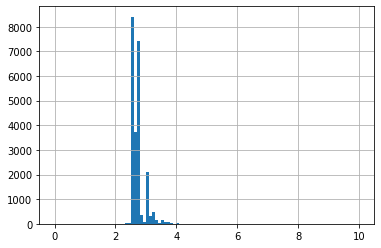

In [60]:
data['ceiling_height'].hist(bins=100, range=(0,10));

Насколько видно по гистограмме, наиболее часто встречаются квартиры с высотой потолков от 2.5 до 4 м. Однако, в нашем наборе данных присутствуют значения от 1 до 100 м.

<ins>По информации из свободного доступа</ins> минимальная высота в жилых помещениях составляет **2.5 м**.

Основываясь на том, что при вводе информации могла быть допущена ошибка, скорректирую значения:
* если значение высоты меньше `2.5 м` - умножу на 10;
* если значение высоты больше `(2.5 * 10) = 25 м` - разделю на 10.

In [61]:
def correct_height(height):
    """
    Функция на входе получает значение высоты потолка.
    Если значение ниже минимума, то возвращается значение увеличенное на порядок.
    Если значение выше (минимум * 10), то возвращается значение уменьшенное на порядок.
    """
    if height < 2.5:
        return height * 10
    
    elif height >= 25:
        return height / 10
    
    else:
        return height

Применю корректирующую функцию к датасету:

In [62]:
data['ceiling_height'] = data['ceiling_height'].apply(correct_height)

In [63]:
data['ceiling_height'].describe()

count   23,589.0
mean         2.8
std          1.2
min          2.5
25%          2.5
50%          2.6
75%          2.8
max         24.9
Name: ceiling_height, dtype: float64

Теперь имеем набор данных в диапазоне от 2.5 м до 24.9 м - вероятно, здесь все еще могут присутствовать аномальные значения, но для дальнейшей корректировки потребуется дополнительная информация.

[Вернуться к оглавлению](#point0)
#### Другие столбцы

Столбец `last_price`

In [64]:
data['last_price'].describe()

count        23,589.0
mean      6,517,459.9
std      10,853,124.9
min          12,190.0
25%       3,400,000.0
50%       4,626,540.0
75%       6,750,000.0
max     763,000,000.0
Name: last_price, dtype: float64

Обращают на себя минимальное (12 190) и максимальное (763 000 000) значения цены.

Скорректируем данные, внеся ограничение на цену: от 400 000 руб до 420 000 000 руб.

In [65]:
data = data.query('400000 < last_price < 420000000')

Столбец `total_area`

In [66]:
data['total_area'].describe()

count   23,586.0
mean        60.2
std         35.0
min         12.0
25%         40.0
50%         52.0
75%         69.7
max        631.2
Name: total_area, dtype: float64

In [67]:
data.groupby('total_area')['total_area'].count().tail(10)

total_area
491.0    1
494.1    1
495.0    1
500.0    2
507.0    1
517.0    1
590.0    1
618.0    1
631.0    1
631.2    1
Name: total_area, dtype: int64

Для оценки адекватности данных я обратился к [информации в интернете](https://spb.cian.ru/cat.php?deal_type=sale&engine_version=2&mintarea=300&offer_type=flat&region=2&sort=area_order). Насколько видно, на рынке доступны предложения о продаже квартир площадью вплоть до 1000 м² и более. Отсеим значения квартир площадей более 500 м², тем более, что такие предложения единичны.

In [68]:
data = data.query('total_area <= 500')

Столбец `rooms`

In [69]:
data.groupby('rooms')['rooms'].count().tail(10)

rooms
5     322
6     104
7      52
8      12
9       8
10      3
11      2
14      2
16      1
19      1
Name: rooms, dtype: int64

Отсеим значения `> 15`

In [70]:
data = data.query('rooms < 15')

Столбец `balcony`

In [71]:
data.groupby('balcony')['balcony'].count().tail(10)

balcony
0    15188
1     4178
2     3648
3       81
4      181
5      302
Name: balcony, dtype: int64

Обычно в типовых квартирах не более двух балконов. Однако, в частных домах или коттеджах количество балконов может отличаться. Отсеим значения, где количество балконов `> 3`:

In [72]:
data = data.query('balcony <= 3')

Столбец `floors_total`

In [73]:
data['floors_total'].describe()

count   23,095.0
mean        10.6
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64

Обращает внимание 60-этажное здание. Но [по информации из интернета](https://yandex.ru/search/?text=%D1%81%D0%B0%D0%BC%D0%BE%D0%B5+%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%BE%D0%B5+%D0%B6%D0%B8%D0%BB%D0%BE%D0%B5+%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5+%D0%B2+%D1%81%D0%B0%D0%BD%D0%BA%D1%82-%D0%BF%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B5&lr=66), в Санкт-Петербурге есть здание с количетством этажей 87, поэтому опредленно отнести к аномальным такие значения мы не можем.

Для других столбцов также не выявлено явно аномальных значений.

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23095 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23095 non-null  int64         
 1   last_price            23095 non-null  float64       
 2   total_area            23095 non-null  float64       
 3   first_day_exposition  23095 non-null  datetime64[ns]
 4   rooms                 23095 non-null  int64         
 5   ceiling_height        23095 non-null  float64       
 6   floors_total          23095 non-null  int64         
 7   living_area           23095 non-null  float64       
 8   floor                 23095 non-null  int64         
 9   is_apartment          23095 non-null  bool          
 10  studio                23095 non-null  bool          
 11  open_plan             23095 non-null  bool          
 12  kitchen_area          23095 non-null  float64       
 13  balcony         

**Выводы:**
* Заголовки столбцов датасета приведены к рекомендуемому виду ("змеиный регистр")
* Проведен поиск пропусков: для некоторых типов данных (например, название населенного пункта) строки с пропуском были удалены. Для некоторых данных пропущенные значения заменены наиболее характерными значениями (медиана) для указанной выборки. Некоторые данные содержащие пропуски оставлены как есть. Наиболее вероятная причина возникновения пропусков - их появление на этапе внесения информации: возможно, не все категории данных являются обязательными к заполнению, а также есть вероятность формирования датасета на основе нескольких источников с разной полнотой данных.
* Данные хранящие информацию о дате приведены к более подходящему для исследования типу: `datetime`
* Произведен поиск явных и неявных дубликатов: названия населенных пунктов приведены к более информативному виду, дубликаты отсеяны.
* Для некоторых типов данных, например высота потолка, убраны явно аномальные значения.

[Вернуться к оглавлению](#point0)
## Шаг 3. Категоризация данных

Добавим в датасет новый столбец `price_m2` - цена одного квадратного метра. Его значением будет отношение `last_price` (цена на момент снятия с публикации) к `total_area` (общая площадь квартиры в квадратных метрах, м²). Округлим полученное значение до копеек.

In [75]:
data['price_m2'] = round(data['last_price'] / data['total_area'], 2)

Добавим в датасет новые столбцы:
* `pub_day` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* `pub_month` - месяц публикации объявления;
* `pub_year` - год публикации объявления.

In [76]:
data['pub_day'] = data['first_day_exposition'].dt.weekday
data['pub_month'] = data['first_day_exposition'].dt.month
data['pub_year'] = data['first_day_exposition'].dt.year

Добавим в датасет новый столбец `floor_kind` - тип этажа квартиры (значения — «первый», «последний», «другой»). Для этого используем функцию `set_floor_kind`:

In [77]:
def set_floor_kind(row):
    """
    Функция принимает в качестве аргумента строку датафрейма.
    Переменные floors_total и floor принимают значения соответсвующих столбцов.
    Если значение floor = 1, то возвращается значение 'первый'
    Если значние floor равно floors_total, возвращается 'последний'
    Иначе: 'другой'
    """
    floors_total, floor = row['floors_total'], row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

Применим функцию к датасету:

In [78]:
data['floor_kind'] = data.apply(set_floor_kind, axis = 1) # axis = 1 (columns): применить функцию к каждой строке

Добавим в датасет новый столбец `center_km` - расстояние до центра города в километрах. 

In [79]:
data['center_km'] = data['city_centers_nearest'] / 1000

Изменим тип данных столбца на `int`:

In [80]:
data['center_km'] = data['center_km'].astype(int)

Проверим внесенные изменения:

In [81]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,pub_day,pub_month,pub_year,floor_kind,center_km
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16,51.0,8,False,...,482.0,2,755.0,-1,"120,370.4",3,3,2019,другой,16
1,7,"3,350,000.0",40.4,2018-12-04,1,2.8,11,18.6,1,False,...,NaN,0,NaN,81,"82,920.8",1,12,2018,первый,18
2,10,"5,196,000.0",56.0,2015-08-20,2,2.5,5,34.3,4,False,...,90.0,2,574.0,558,"92,785.7",3,8,2015,другой,13
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14,98.1,9,False,...,84.0,3,234.0,424,"408,176.1",4,7,2015,другой,6
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14,32.0,13,False,...,112.0,1,48.0,121,"100,000.0",1,6,2018,другой,8


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23095 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23095 non-null  int64         
 1   last_price            23095 non-null  float64       
 2   total_area            23095 non-null  float64       
 3   first_day_exposition  23095 non-null  datetime64[ns]
 4   rooms                 23095 non-null  int64         
 5   ceiling_height        23095 non-null  float64       
 6   floors_total          23095 non-null  int64         
 7   living_area           23095 non-null  float64       
 8   floor                 23095 non-null  int64         
 9   is_apartment          23095 non-null  bool          
 10  studio                23095 non-null  bool          
 11  open_plan             23095 non-null  bool          
 12  kitchen_area          23095 non-null  float64       
 13  balcony         

**Вывод:** произведены категоризация и дополнительное преобразования данных, что поможет в исследовании представленной информации.

[Вернуться к оглавлению](#point0)
## Шаг 4. Исследовательский анализ данных
### Изучение параметров объектов 
Построим гистрограммы для следующих параметров:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

Для вывода описательной характеристики по различным параметрам использую вспомогательную функцию:

In [83]:
def common_info(param):
    t1 = data.groupby(param)[param].count().sort_values(ascending=False)
    t2 = data[param].describe()
    print(f"Данные распределены следующим образом:")
    print(f"- Всего значений: {data[param].count()}")
    print(f"- Минимальное значение: {data[param].min():.1f}")
    print(f"- Максимальное значение: {data[param].max():.1f}")
    print(f"- Самое частое значение: {t1.index[0]} (встречается {t1.iloc[0]} раз)")
    print(f"- Нормальные значения находятся в диапазоне от {t2['25%']} до {t2['75%']}")

Построим гистограмму и выведем основные характеристики для общей площади квартир:

Данные распределены следующим образом:
- Всего значений: 23095
- Минимальное значение: 12.0
- Максимальное значение: 500.0
- Самое частое значение: 45.0 (встречается 416 раз)
- Нормальные значения находятся в диапазоне от 40.0 до 68.8


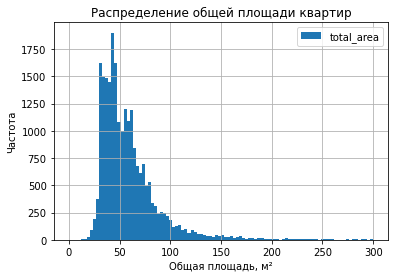

In [84]:
data.plot(y='total_area', kind='hist', bins=100, range=(0,300), grid=True)
plt.title('Распределение общей площади квартир')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Частота')

common_info('total_area')

Построим гистограмму и выведем основные характеристики для жилой площади квартир:

Данные распределены следующим образом:
- Всего значений: 23095
- Минимальное значение: 2.0
- Максимальное значение: 347.5
- Самое частое значение: 18.0 (встречается 880 раз)
- Нормальные значения находятся в диапазоне от 18.6 до 42.0


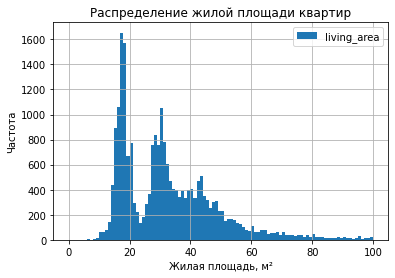

In [85]:
data.plot(y='living_area', kind='hist', bins=100, range=(0,100), grid=True)
plt.title('Распределение жилой площади квартир')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Частота')

common_info('living_area')

Построим гистограмму и выведем основные характеристики для площади кухни:

Данные распределены следующим образом:
- Всего значений: 23095
- Минимальное значение: 0.0
- Максимальное значение: 121.9
- Самое частое значение: 6.0 (встречается 1288 раз)
- Нормальные значения находятся в диапазоне от 7.0 до 11.6


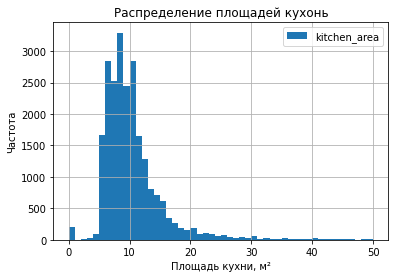

In [86]:
data.plot(y='kitchen_area', kind='hist', bins=50, range=(0,50), grid=True)
plt.title('Распределение площадей кухонь')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Частота')

common_info('kitchen_area')

Построим гистограмму и выведем основные характеристики для цены:

Данные распределены следующим образом:
- Всего значений: 23095
- Минимальное значение: 430000.0
- Максимальное значение: 401300000.0
- Самое частое значение: 4500000.0 (встречается 333 раз)
- Нормальные значения находятся в диапазоне от 3400000.0 до 6700000.0


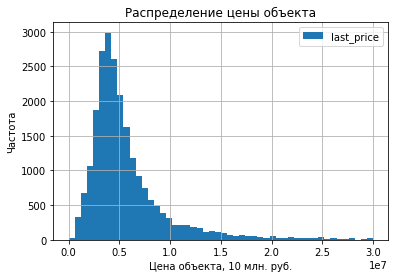

In [87]:
data.plot(y='last_price', kind='hist', bins=50, range=(0,30000000), grid=True)
plt.title('Распределение цены объекта')
plt.xlabel('Цена объекта, 10 млн. руб.')
plt.ylabel('Частота')

common_info('last_price')

Построим гистограмму и выведем основные характеристики для количества комнат:

Данные распределены следующим образом:
- Всего значений: 23095
- Минимальное значение: 0.0
- Максимальное значение: 14.0
- Самое частое значение: 1 (встречается 7974 раз)
- Нормальные значения находятся в диапазоне от 1.0 до 3.0


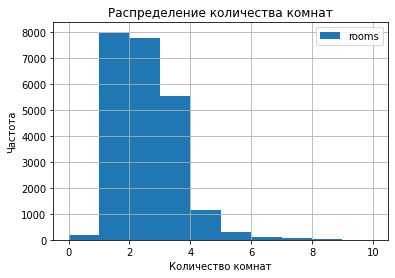

In [88]:
data.plot(y='rooms', kind='hist', grid=True, range=(0,10))
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')

common_info('rooms')

Построим гистограмму и выведем основные характеристики для высоты потолков:

Данные распределены следующим образом:
- Всего значений: 23095
- Минимальное значение: 2.5
- Максимальное значение: 24.9
- Самое частое значение: 2.55 (встречается 4255 раз)
- Нормальные значения находятся в диапазоне от 2.55 до 2.75


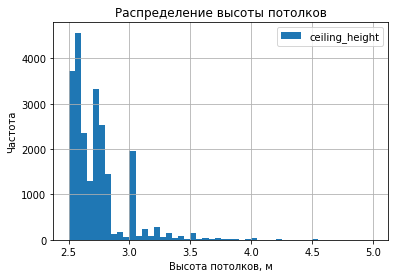

In [89]:
data.plot(y='ceiling_height', kind='hist', grid=True, range=(2.5,5), bins=50)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')

common_info('ceiling_height')

Построим гистограмму и выведем основные характеристики для этажей:

Данные распределены следующим образом:
- Всего значений: 23095
- Минимальное значение: 1.0
- Максимальное значение: 33.0
- Самое частое значение: 2 (встречается 3291 раз)
- Нормальные значения находятся в диапазоне от 2.0 до 8.0


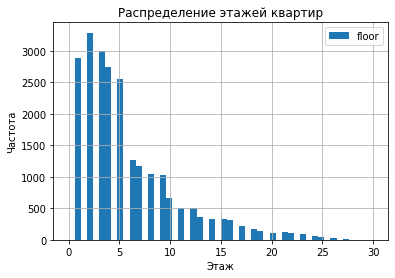

In [90]:
data.plot(y='floor', kind='hist', bins=50, range=(0,30), grid=True)
plt.title('Распределение этажей квартир')
plt.xlabel('Этаж')
plt.ylabel('Частота')

common_info('floor')

Построим гистограмму и выведем основную информацию для категории этажей:

floor_kind
другой       16947
первый        2887
последний     3261
Name: floor_kind, dtype: int64

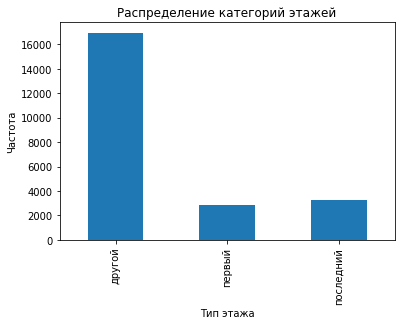

In [91]:
data.groupby('floor_kind')['floor_kind'].count().plot(title='Распределение категорий этажей', 
                                                      xlabel='Тип этажа', ylabel='Частота', kind='bar')
data.groupby('floor_kind')['floor_kind'].count()

Построим гистограмму и выведем основные характеристики для общего количества этажей:

Данные распределены следующим образом:
- Всего значений: 23095
- Минимальное значение: 1.0
- Максимальное значение: 60.0
- Самое частое значение: 5 (встречается 5723 раз)
- Нормальные значения находятся в диапазоне от 5.0 до 16.0


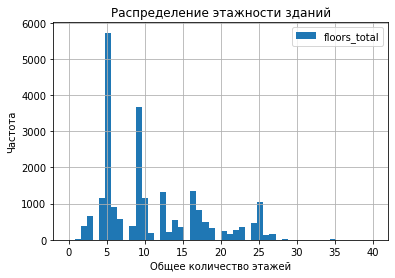

In [92]:
data.plot(y='floors_total', kind='hist', bins=50, range=(0,40), grid=True)
plt.title('Распределение этажности зданий')
plt.xlabel('Общее количество этажей')
plt.ylabel('Частота')

common_info('floors_total')

Построим гистограмму и выведем основные характеристики для расстояний до центра города (м):

Данные распределены следующим образом:
- Всего значений: 23095
- Минимальное значение: 181.0
- Максимальное значение: 270000.0
- Самое частое значение: 21888.0 (встречается 577 раз)
- Нормальные значения находятся в диапазоне от 10007.0 до 21888.0


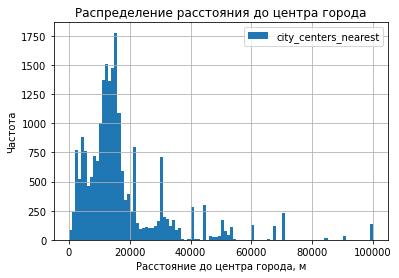

In [93]:
data.plot(y='city_centers_nearest', kind='hist', bins=100, range=(0,100000), grid=True)
plt.title('Распределение расстояния до центра города')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Частота')

common_info('city_centers_nearest')

Построим гистограмму и выведем основные характеристики для расстояния до ближайшего аэропорта:

Данные распределены следующим образом:
- Всего значений: 17720
- Минимальное значение: 0.0
- Максимальное значение: 84869.0
- Самое частое значение: 37434.0 (встречается 58 раз)
- Нормальные значения находятся в диапазоне от 18557.0 до 37242.0


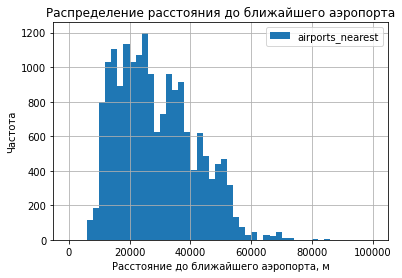

In [94]:
data.plot(y='airports_nearest', kind='hist', bins=50, range=(0,100000), grid=True)
plt.title('Распределение расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта, м')
plt.ylabel('Частота')

common_info('airports_nearest')

Построим гистограмму и выведем основные характеристики для расстояния до ближайшего парка:

Данные распределены следующим образом:
- Всего значений: 7874
- Минимальное значение: 1.0
- Максимальное значение: 3190.0
- Самое частое значение: 441.0 (встречается 64 раз)
- Нормальные значения находятся в диапазоне от 287.25 до 612.0


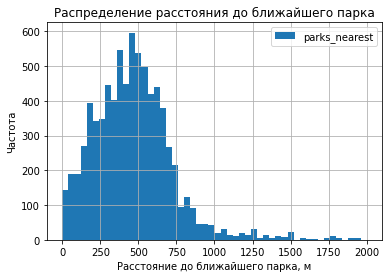

In [95]:
data.plot(y='parks_nearest', kind='hist', bins=50, range=(0,2000), grid=True)
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Частота')

common_info('parks_nearest')

Построим гистограмму дней публикаций:

pub_day
0    3505
1    4088
2    3879
3    4186
4    3908
5    1882
6    1647
Name: pub_day, dtype: int64

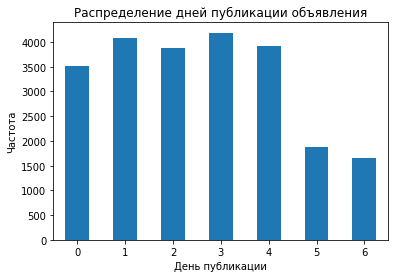

In [96]:
data.groupby('pub_day')['pub_day'].count().plot(rot=0, title='Распределение дней публикации объявления', 
                                                xlabel='День публикации', ylabel='Частота', kind='bar')
data.groupby('pub_day')['pub_day'].count()

Построим гистограмму месяцев публикаций:

pub_month
1     1450
2     2574
3     2526
4     2303
5     1248
6     1720
7     1655
8     1696
9     1937
10    2086
11    2301
12    1599
Name: pub_month, dtype: int64

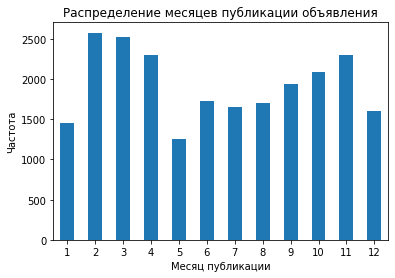

In [97]:
data.groupby('pub_month')['pub_month'].count().plot(rot=0, title='Распределение месяцев публикации объявления', 
                                                    xlabel='Месяц публикации', ylabel='Частота', kind='bar')
data.groupby('pub_month')['pub_month'].count()

**Выводы**:
* Самая распространенная площадь квартир: 45 м². Обычно значения находятся в диапазоне от 40 до 68 м². В распределении нет явных выбросов.
* Самое часто встречающееся значение жилой площади: 18 м². Это значение вместе с еще двумя пиками в районе 30 и 42 м² выделяются из выборки. Медианное значение составляет 30м².
* Самая распространенная площадь кухни: 6 м². Среди выборки присутствует несколько пиковых значений.
* Самая популярная цена объекта составляет 4 500 000 руб. На гистограмме распределения цен не заметно выбросов.
* 1- и 2-комнатные квартиры - самые распространенные среди исследуемых. Немного отстают трехкомнатные квартиры. Количество квартир с другим количеством комнат значительно ниже.
* Самая распространенная высота потолка: 2.55 м. В распределении заметно несколько пиковых значений в районе 2.7 и 3.0 - это может быть объяснено тем, что, как правило, высота потолка стандартизирована.
* Квартиры, расположенные на втором этаже самые распространенные среди выставленных на продажу. В целом, квартиры расположенные на 1-5 этажах ярко выделяются среди всей выборки - это можно объяснить тем, что основную массу застройки составляют именно 5-этажные здания.
* Квартиры расположенные последних этаж встречаются в объявлениях немного чаще, чем квартиры на первом. 
* В Санкт-Петербурге и пригороде самые распространенные здания - пятиэтажные. На втором месте девятиэтажные. На гистограмме есть несколько пиковых значений, которые можно связать с тем, что, как правило, здания имеют регламентированное количество этажей.
* Самое распространенное значение расстояние до центра города: 21888 м. - лидируют объявления из поселка Мурино. Для 590 значений было одно без пропуска - именно им и заполнились все остальные значения, **следует учитывать это при чтении гистограммы**. Из данных видно, что основная масса объявлений о продаже квартир, которые находятся в пределах 20 км от центра города. Квартир с окраины города (10-17.5 км) встречается больше, чем тех, что ближе к центру.
* Самое распространенное значение расстояние до ближайшего аэропорта: 37434 м.
* Чаще всего парк находится примерно 500 метровой доступности.
* Количество публикаций объявлений в выходные дни значительно меньше, чем в будни.
* Наиболее популярные для публикации объявлений месяцы - февраль, март и апрель. Полагаю, это можно связать с сезонностью на рынке недвижимости.


[Вернуться к оглавлению](#point0)
### Исследование количества дней публикации объявления

Выведем гистрограмму с распределением значений количества дней публикации объявления:

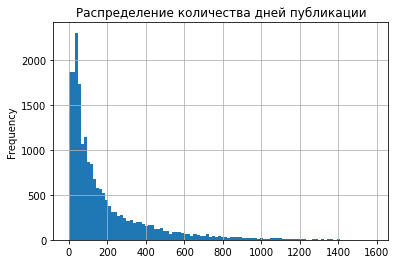

In [98]:
data['days_exposition'].plot(title='Распределение количества дней публикации', 
                             xlabel='Количество дней публикации', ylabel='Частота',kind='hist', 
                             bins=100, range=(0, 1580), grid=True);

В целом график выглядит довольно гладко, но заметны два пика. Можно рассмотреть эту область данных более подробно:

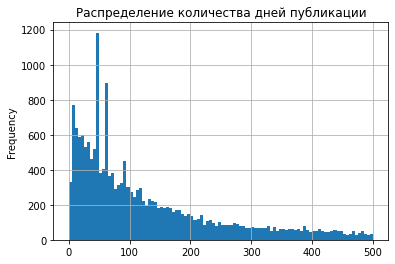

In [99]:
data['days_exposition'].plot(title='Распределение количества дней публикации', 
                             xlabel='Количество дней публикации', ylabel='Частота',kind='hist', 
                             bins=100, range=(0, 500), grid=True);

Выведем 10 самых частых значений:

In [100]:
data.groupby('days_exposition')['days_exposition'].count().sort_values(ascending=False).head(10)

days_exposition
-1     3048
 45     869
 60     527
 7      226
 30     206
 90     191
 4      170
 3      154
 5      150
 14     147
Name: days_exposition, dtype: int64

`45`, `60`, `7`, `30`, `90` - пятерка лидеров, значения которых ярко выбиваются из серии. Числа не похожи на случайные - именно на такое количество дней может публиковаться объявление о продаже квартиры, например, если это платная услуга. Если еще раз прочитать описание данных в этом столбике - "сколько дней было размещено объявление (от публикации до снятия)" - снятие объявления не всегда означает продажу. Действительно, по истечении времени объявление могло быть снято с листинга по какой-то причине.

Построим диаграмму размаха для `days_exposition`:

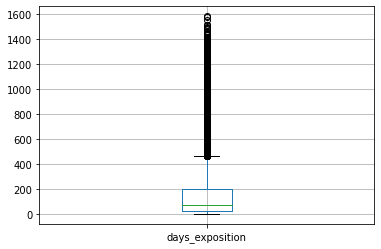

In [101]:
data.boxplot(column='days_exposition');

In [102]:
data['days_exposition'].describe()

count   23,095.0
mean       156.7
std        213.7
min         -1.0
25%         23.0
50%         74.0
75%        199.0
max      1,580.0
Name: days_exposition, dtype: float64

In [103]:
def right_whisker(param): # функция для расчета границы правого уса
    t = data[param].describe()
    return t['75%'] + 1.5 * (t['75%'] - t['25%']) # Q3 + 1.5 * IQR
    

# граница правого уса для days_exposition:
right_whisker('days_exposition')

463.0

**Выводы:**
* Как видно из полученных данных, среднее значение `157` и медиана `74` имеют сильное отличие. На искажение среднего значения повлияла "пятерка лидеров" с пиковыми значениями.
* Количество дней, которое обычно требуется для продажи квартир лежит в диапазоне нормальных значений: примерно от 23 до 199 дней.
* Быстрыми продажи можно считать, если они совершаются в течение первых 3 недель публикации (до первого квартиля), к необычно долгим я бы отнес те, которые лежат за пределами "правого уса", т.е. продаются более 463 дней.

[Вернуться к оглавлению](#point0)
### Исследование факторов, влияющих на общую (полную) стоимость объекта
#### Анализ стоимости объекта от общей площади

'Коэффициент корреляции Пирсона: 0.68'

'Граница правого уса: 112.00'

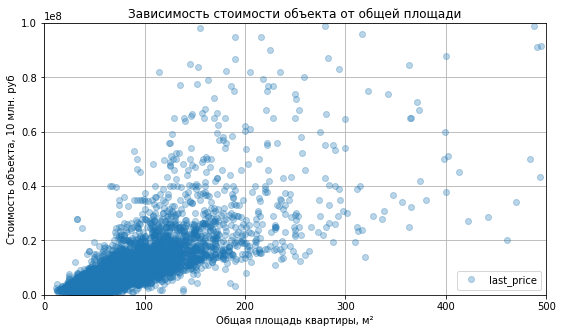

In [104]:
# построение графика
data.plot(x='total_area', y='last_price', title='Зависимость стоимости объекта от общей площади', 
    xlabel='Общая площадь квартиры, м²', ylabel='Стоимость объекта, 10 млн. руб', 
    xlim=(0,500), ylim=(0,100000000), style='o', grid=True, figsize=(9, 5), alpha=0.3)

# коэффициент корреляции Пирсона
display(f"Коэффициент корреляции Пирсона: {data['total_area'].corr(data['last_price']):.2f}")

# граница правого уса
display(f"Граница правого уса: {right_whisker('total_area'):.2f}")

**Вывод:** Судя по графику, между общей площадью квартиры и ее стоисотью есть зависимость: коэффициент корреляции Пирсона `0.68` - указывает на заметную положительную зависимость величин. Для значений площади примерно до 100 м² видна довольно четкая зависимость цены от площади. Следует принять во внимание, что на погрешность может влиять тот факт, что квартира одной и той же площади может иметь разную стоимость в зависимости от населенного пункта.

[Вернуться к оглавлению](#point0)
#### Анализ стоимости объекта от жилой площади

'Коэффициент корреляции Пирсона: 0.62'

'Граница правого уса: 77.10'

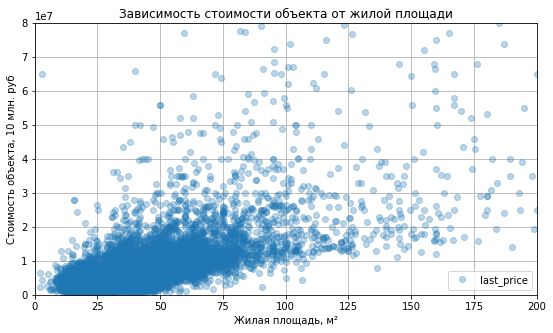

In [105]:
# построение графика
data.plot(x='living_area', y='last_price', title='Зависимость стоимости объекта от жилой площади', 
    xlabel='Жилая площадь, м²', ylabel='Стоимость объекта, 10 млн. руб', 
    xlim=(0,200), ylim=(0,80000000), style='o', grid=True, 
    figsize=(9, 5), alpha=0.3)

# коэффициент корреляции Пирсона
display(f"Коэффициент корреляции Пирсона: {data['living_area'].corr(data['last_price']):.2f}")

# граница правого уса
display(f"Граница правого уса: {right_whisker('living_area'):.2f}")

**Вывод:** Зависимость стоимости от жилой площади также заметна. Коэффициент корреляции Пирсона: 0.62 указывает на положительную зависимость, но менее слабую, чем от общей площади. Это можно объяснить тем, что доля жилой площади для разных планировок квартир может варьироваться.

[Вернуться к оглавлению](#point0)
#### Анализ стоимости объекта от площади кухни

'Коэффициент корреляции Пирсона: 0.51'

'Граница правого уса: 18.50'

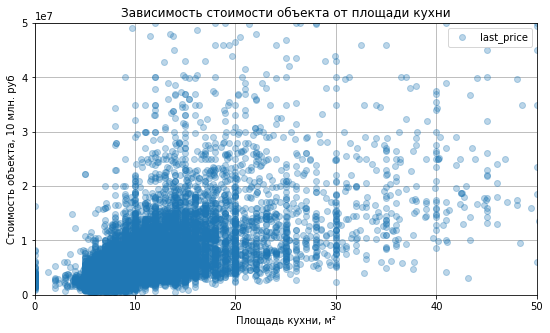

In [106]:
# построение графика
data.plot(x='kitchen_area', y='last_price', title='Зависимость стоимости объекта от площади кухни', 
    xlabel='Площадь кухни, м²', ylabel='Стоимость объекта, 10 млн. руб', 
    xlim=(0,50), ylim=(0,50000000), style='o', grid=True, 
    figsize=(9, 5), alpha=0.3)

# коэффициент корреляции Пирсона
display(f"Коэффициент корреляции Пирсона: {data['kitchen_area'].corr(data['last_price']):.2f}")

# граница правого уса
display(f"Граница правого уса: {right_whisker('kitchen_area'):.2f}")

**Вывод:** Зависимость стоимости от площади кухни еще менее выражена.

[Вернуться к оглавлению](#point0)
#### Анализ стоимости объекта от количества комнат

'Коэффициент корреляции Пирсона: 0.39'

'Граница правого уса: 6.00'

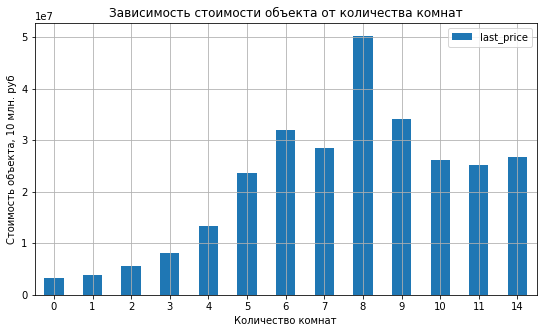

In [107]:
# построение графика
rooms_stat = data.pivot_table(index='rooms', values='last_price')
rooms_stat.plot(title='Зависимость стоимости объекта от количества комнат', xlabel='Количество комнат', 
    ylabel='Стоимость объекта, 10 млн. руб', grid=True, 
    figsize=(9, 5), kind='bar', rot=0)

# коэффициент корреляции Пирсона
display(f"Коэффициент корреляции Пирсона: {data['rooms'].corr(data['last_price']):.2f}")

# граница правого уса
display(f"Граница правого уса: {right_whisker('rooms'):.2f}")

Обращает на себя внимание цена на 8-комнатные квартиры. Проверим такие значения:

In [108]:
display(data.query('rooms == 8')['locality_name'].unique())
len(data.query('rooms == 8')['locality_name'])

array(['Санкт-Петербург', 'Колпино'], dtype=object)

12

12 8-комнатных квартир в Санкт-Петербурге, Колпино выделяются ценой на фоне других.

Для дальнейшего исследования исключим данное значение и проверим распределение еще раз.

In [109]:
rooms_stat = rooms_stat.query('rooms != 8')

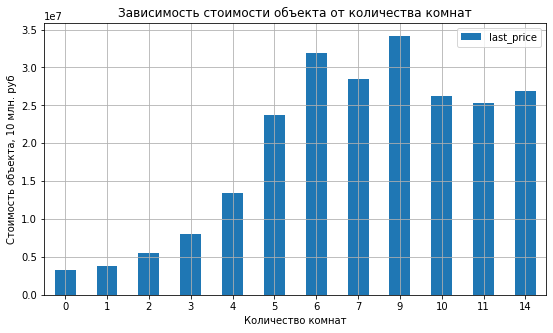

In [110]:
# построение графика
rooms_stat.plot(title='Зависимость стоимости объекта от количества комнат', xlabel='Количество комнат', 
    ylabel='Стоимость объекта, 10 млн. руб', grid=True, 
    figsize=(9, 5), kind='bar', rot=0);

**Вывод:** Обращают на себя внимание цены для 8-комнатных квартир в Санкт-Петербурге, Колпино выделяются ценой. В рамках исследования нужно дать обратную связь по этим данным, чтобы эти объекты отдельно проверили (возможно, цена указана с ошибкой). В целом, заметен рост средней стоимости квартиры до количества комнат `= 6`, затем наблюдается спад и ближе к концу списка снова увеличение. Это можно объяснить тем, что предложений квартир с большим количеством комнат гораздо меньше, чем 1,2,3 - комнатных, что влияет на точность результата.

[Вернуться к оглавлению](#point0)
#### Анализ стоимости объекта от этажа, на котором расположена квартира (первый, последний, другой)

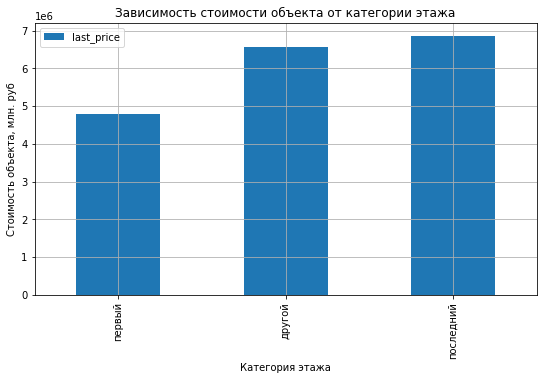

In [111]:
data.pivot_table(index='floor_kind', 
    values='last_price').sort_values(by='last_price').plot(
    title='Зависимость стоимости объекта от категории этажа', 
    xlabel='Категория этажа', 
    ylabel='Стоимость объекта, млн. руб', grid=True, 
    figsize=(9, 5), kind='bar'
);

**Вывод:** Судя по имеющимся данным, наблюдается зависимость стоимости объекта от этажа. Квартиры расположенные на первом этаже, как правило, стоят дешевле. Квартиры на последнем этаже - самые дорогие.

[Вернуться к оглавлению](#point0)
#### Анализ стоимости объекта от даты размещения (день недели, месяц, год)

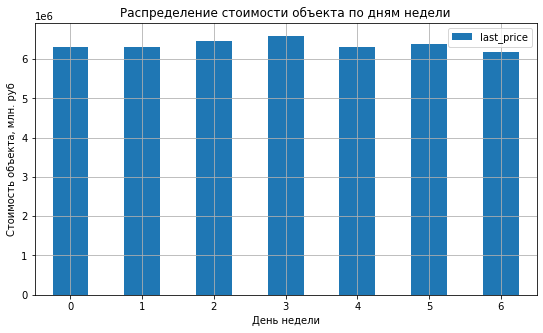

In [112]:
data.pivot_table(index='pub_day', 
    values='last_price').plot(
    title='Распределение стоимости объекта по дням недели',
    xlabel='День недели', 
    ylabel='Стоимость объекта, млн. руб', grid=True, 
    figsize=(9, 5), rot=0, kind='bar');

In [113]:
data.pivot_table(index='pub_day', values='last_price')

,last_price
pub_day,
0,"6,315,370.0"
1,"6,306,934.3"
2,"6,445,614.6"
3,"6,584,994.6"
4,"6,315,522.2"
5,"6,371,884.9"
6,"6,175,920.1"


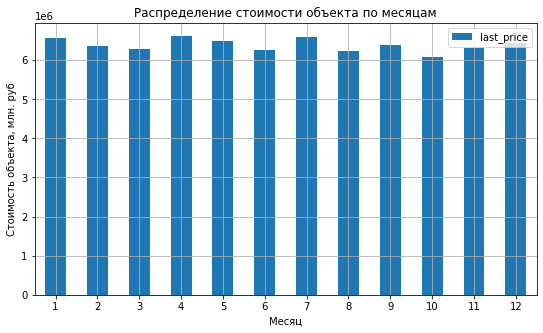

In [114]:
data.pivot_table(index='pub_month', 
                 values='last_price').plot(title='Распределение стоимости объекта по месяцам', 
                                           xlabel='Месяц', 
                                           ylabel='Стоимость объекта, млн. руб', grid=True, 
                                           figsize=(9, 5), rot=0, kind='bar');

In [115]:
data.pivot_table(index='pub_month', values='last_price')

,last_price
pub_month,
1,"6,577,327.4"
2,"6,358,770.0"
3,"6,297,011.7"
4,"6,619,174.1"
5,"6,494,745.5"
6,"6,250,181.7"
7,"6,598,935.2"
8,"6,236,825.2"
9,"6,398,291.0"


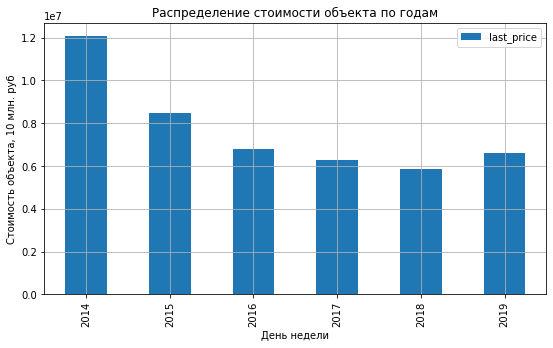

In [116]:
data.pivot_table(index='pub_year', 
                 values='last_price').plot(title='Распределение стоимости объекта по годам', 
                                           xlabel='День недели', 
                                           ylabel='Стоимость объекта, 10 млн. руб', grid=True, 
                                           figsize=(9, 5), kind='bar');

In [117]:
data.pivot_table(index='pub_year', values='last_price')

,last_price
pub_year,
2014,"12,093,398.7"
2015,"8,494,106.1"
2016,"6,774,801.3"
2017,"6,290,928.4"
2018,"5,880,703.6"
2019,"6,588,252.6"


**Выводы:**
* В течение недели заметное некоторое колебание средней стоимости объекта, однако какой-либо выраженной зависимости не наблюдается. Также, в распределении нет наблюдаемого пика. Разница между самой низкой (6,073,078.7) и самой высокой (6,619,174.1) средней стоимостью составляет всего 8 %. Зависимости стоимости объекта от дня недели публикации объявления не наблюдается.
* Март, июнь, август, октябрь - минимумы средней стоимости в распредлении по месяцам. Можно предположить, что это отражает сезонность на рынке недвижимости.
* При распределении средней стоимости по годам заметно явное снижение в период 2014-2018 гг. В 2019 наблюдается небольшое повышение. Если исходить из достоверности имеющихся данных, такой характер распределения может быть обусловлен различными факторами, включая экономические условия, спрос и предложение на рынке недвижимости, инфляцию, изменение цен на строительные материалы и другие факторы.

[Вернуться к оглавлению](#point0)
### Анализ средней стоимости одного квадратного метра

Найдем среди наших данных 10 населённых пунктов с наибольшим числом объявлений:

In [118]:
top_10_city = data['locality_name'].value_counts().head(10)
top_10_city

Санкт-Петербург    15316
Мурино               577
Кудрово              466
Шушары               431
Всеволожск           386
Пушкин               360
Колпино              329
Парголово            327
Гатчина              296
Выборг               236
Name: locality_name, dtype: int64

Рассчитаем среднюю стоимость квадратного метра жилья:

In [119]:
top_price = data.query('locality_name in @top_10_city.index').pivot_table(
    index='locality_name', values='price_m2').sort_values(by='price_m2', ascending=False)

top_price

,price_m2
locality_name,
Санкт-Петербург,"114,298.8"
Пушкин,"102,785.6"
Кудрово,"95,490.8"
Парголово,"90,175.9"
Мурино,"86,182.6"
Шушары,"78,843.2"
Колпино,"75,273.9"
Всеволожск,"68,686.1"
Гатчина,"68,640.7"


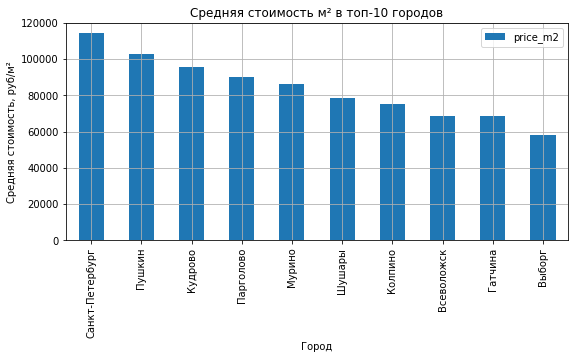

In [120]:
# построим гистограмму
top_price.plot(title='Средняя стоимость м² в топ-10 городов', 
               xlabel='Город', 
               ylabel='Средняя стоимость, руб/м²', grid=True, 
               figsize=(9, 4), kind='bar');

**Выводы:** 
* Топ 10 населенных пунктов по количеству объявлений: 'Санкт-Петербург', 'Пушкин', 'Кудрово', 'Парголово', 'Мурино', 'Шушары','Колпино', 'Всеволожск', 'Гатчина', 'Выборг'.
* Самая высокая средняя стоимость квадратного метра жилья в г. Санкт-Петербург: 114,298.8 руб/м².
* В Выборге самая низкая средняя стоимость квадратного метра - 58,193.0 руб/м²

[Вернуться к оглавлению](#point0)
### Анализ средней стоимости квадратного метра в зависимости от удаленности от центра

Сформируем таблицу отображающую среднюю стоимость жилья для каждого километра в г. Санкт-Петербург и выведем первые 10 строк:

In [121]:
spb = 'Санкт-Петербург'
avg_km_price = data.query('locality_name == @spb').pivot_table(index='center_km', values='last_price')
avg_km_price.head(10)

,last_price
center_km,
0,"23,442,315.4"
1,"18,762,413.4"
2,"16,085,742.7"
3,"11,936,706.1"
4,"13,115,016.5"
5,"14,884,257.4"
6,"14,051,836.0"
7,"11,766,740.2"
8,"8,351,053.8"


Отобразим распределение в виде графика:

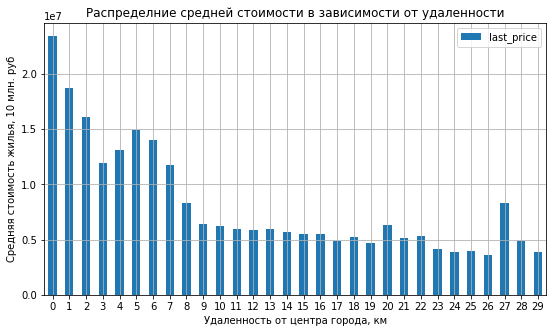

In [122]:
avg_km_price.plot(title='Распределние средней стоимости в зависимости от удаленности', 
               xlabel='Удаленность от центра города, км', 
               ylabel='Средняя стоимость жилья, 10 млн. руб', grid=True, 
               figsize=(9, 5), kind='bar', rot=0);

**Вывод:** Как и следовало ожидать, квартиры, расположенные в пределах 2 км от центра, обладают самой высокой стоимостью. В целом, с увеличением расстояния средняя цена жилья уменьшается. Однако, в распределении можно заметить пиковые значения на удалении от центра - это может указывать на наличие районов в черте города с уникальным, в силу каких-либо причин, ценообразованием (например, элитный жилой комплекс и тп.).

[Вернуться к оглавлению](#point0)

## Общий вывод

Для данных предоставленных сервисом "Яндекс Недвижимость" содержащих информацию о продаже квартир в г. Санкт-Петербурге и пригороде и опубликованных в период с 27.11.2014 по 03.05.2019 было проведено исследование, в рамках которого:
1. Произведена предварительная обработка данных:
  * Заголовки данных приведены к рекомендуемому виду
  *  Обработаны пропуски данных: для некоторых типов данных (например, название населенного пункта) строки с пропуском были удалены. Для некоторых данных (например, высота потолка или площадь кухни) пропущенные значения заменены наиболее характерными для рассматриваемой выборки. Некоторые данные содержащие пропуски оставлены как есть. Наиболее вероятная причина возникновения пропусков - их появление на этапе формирования датасета
  *  Типы данных приведены к удобному для исследованию виду
  *  Обработаны дубликаты
  *  Устранены явно аномальные значения данных
2. Данные были дополнительно преобразованы и категоризированы для более удобного анализа
3. Проведен анализ данных:
  * Исследовано распределение характеристик объектов (общая площадь, площадь кухни, количество комнат, этаж и др.) и определены наиболее типичные значения.
  * Исследовано количество дней публикации объявления о продаже: определен нормальный срок продажи объектов (примерно от 23 до 199 дней), а также быстрый (первые 3 недели) и необычно долгий (более 463 дней)
  * Исследовано влияние различных факторов на общую (полную) стоимость объекта. Наиболее явные зависимости цены: 
    * от общей площади,
    * количества комнаты,
    * типа этажа, года публикации.  
  * Обнаружено, что объявления о продаже квартир на 8 этажах имеют аномально высокую цену, на это стоит обратить внимание.
  * Проведен анализ средней стоимости одного квадратного метра в 10 самых популярных по количеству объявлений городах: Самая высокая средняя стоимость квадратного метра жилья в г. Санкт-Петербург: 114,298.8 руб/м². Самая низкая - в Выборге: 58,193.0 руб/м²
  * Рассчитано распределение средней стоимости квадратного метра в зависимости от удаленности от центра

Полученные в ходе исследования результаты могут быть приняты к рассмотрению.

[Вернуться к оглавлению](#point0)